## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [3]:
import pandas as pd
oj = pd.read_csv('data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [4]:
oj.data = oj.iloc[:, 1:]
oj.target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [18]:
### your solution
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(oj.data, oj.target, test_size=1.0/2, random_state=0)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

SVM Default Training error: 0.22616822429906547
SVM Default Test error:     0.302803738317757


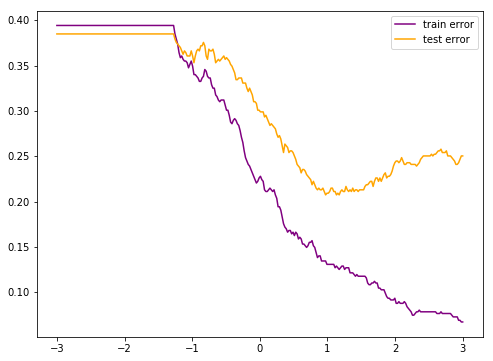

In [40]:
### your solution
from sklearn import svm
import numpy as np
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
print("SVM Default Training error: {}".format(1 - svm_model.score(x_train,y_train)))
print("SVM Default Test error:     {}".format(1 - svm_model.score(x_test,y_test)))

C = np.logspace(start=-3, stop=3, num=300)

svm_train_errors = []
svm_test_errors = []

for i in C: 
    svm_model.set_params(C=i)
    svm_model.fit(x_train,y_train)
    train_error = 1 - svm_model.score(x_train,y_train)
    test_error = 1 - svm_model.score(x_test,y_test)
    svm_train_errors.append(train_error)
    svm_test_errors.append(test_error)
    
import matplotlib.pyplot as plt
plt.plot(np.log10(C), svm_train_errors, c = "purple", label="train error")
plt.plot(np.log10(C), svm_test_errors, c = "orange", label="test error")
plt.legend()
plt.show()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

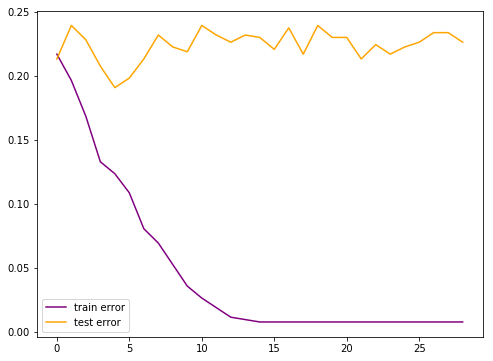

Grid best params: {'criterion': 'entropy', 'max_depth': 3}
Grid best score:  0.8149532710280374
Best model training error: 0.17570093457943925
Best model test error:     0.22056074766355138


In [53]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

tree_model.fit(x_train,y_train)

tree_train_errors = []
tree_test_errors = []

for i in range(1,30):
    tree_model.set_params(max_depth=i)
    tree_model.fit(x_train,y_train)
    train_error = 1 - tree_model.score(x_train,y_train)
    test_error = 1 - tree_model.score(x_test,y_test)
    tree_train_errors.append(train_error)
    tree_test_errors.append(test_error)
    
plt.plot(tree_train_errors, c = "purple", label="train error")
plt.plot(tree_test_errors, c = "orange", label="test error")
plt.legend()
plt.show()

from sklearn.model_selection import GridSearchCV
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(x_train,y_train)

print("Grid best params: {}".format(grid_search_tree.best_params_))
print("Grid best score:  {}".format(grid_search_tree.best_score_))

best_model = grid_search_tree.best_estimator_
best_model.fit(x_train,y_train)

print("Best model training error: {}".format(1 - best_model.score(x_train,y_train)))
print("Best model test error:     {}".format(1 - best_model.score(x_test,y_test)))

(4) What are the first 5 important features?

In [67]:
### your solution
all_features = list(zip(x_train.columns[:], best_model.feature_importances_))
[x for x in all_features if x[1] > 0.0] 

[('WeekofPurchase', 0.024060621158382475),
 ('SpecialCH', 0.02832348525941605),
 ('LoyalCH', 0.79940581662347732),
 ('SalePriceCH', 0.033513255939795532),
 ('PriceDiff', 0.1146968210189287)]

**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [77]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(x_train,y_train)
print("Random Forest training error: {}".format(1 - randomForest.score(x_train,y_train)))
print("Random Forest test error:     {}".format(1 - randomForest.score(x_test,y_test)))

randomGridSearch = GridSearchCV(randomForest, grid_para_forest, cv=5, scoring='accuracy')
randomGridSearch.fit(x_train,y_train)

print("Best Params: {}".format(randomGridSearch.best_params_))
print("Best Score:  {}".format(randomGridSearch.best_score_))

randomForestBestModel = randomGridSearch.best_estimator_
randomForestBestModel.fit(x_train,y_train)
print("RandomForest Best Model training error: {}".format(1 - randomForestBestModel.score(x_train,y_train)))
print("RandomForest Best Model test error: {}".format(1 - randomForestBestModel.score(x_test,y_test)))


Random Forest training error: 0.024299065420560706
Random Forest test error:     0.22242990654205608
Best Params: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
Best Score:  0.8168224299065421
RandomForest Best Model training error: 0.14392523364485976
RandomForest Best Model test error: 0.19626168224299068


(3) What's the first 5 important features?

In [82]:
### your solution
all_features = list(zip(x_train.columns[:], randomForestBestModel.feature_importances_))
[x for x in all_features if x[1] > 0.045] 

[('StoreID', 0.058713539676419166),
 ('LoyalCH', 0.56978919146419926),
 ('SalePriceMM', 0.046894434682285428),
 ('PriceDiff', 0.068992304463941972),
 ('ListPriceDiff', 0.046274454942400498)]